In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [30]:
# Load csv file
points_df = pd.read_csv("2017_2022_PL_Standings.csv", encoding = "latin-1")
points_df

,Source.Name,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2017_2018_PL_Standings.csv,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070,Sergio Agüero - 21,Ederson,? Champions League via league finish
1,2017_2018_PL_Standings.csv,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976,Romelu Lukaku - 16,David de Gea,? Champions League via league finish
2,2017_2018_PL_Standings.csv,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953,Harry Kane - 30,Hugo Lloris,? Champions League via league finish
3,2017_2018_PL_Standings.csv,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049,Mohamed Salah - 32,"Loris Karius, Simon Mignolet",? Champions League via league finish
4,2017_2018_PL_Standings.csv,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282,Eden Hazard - 12,Thibaut Courtois,? Europa League via cup win 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022_PL_Standings.csv,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446,Richarlison - 10,Jordan Pickford,NaN
96,2021_2022_PL_Standings.csv,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308,Raphinha - 11,Illan Meslier,NaN
97,2021_2022_PL_Standings.csv,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278,Maxwel Cornet - 9,Nick Pope,Relegated
98,2021_2022_PL_Standings.csv,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614,Emmanuel Dennis - 10,Ben Foster,Relegated


In [31]:
# Drop columns not needed
points_df = points_df.drop(columns=["Top Team Scorer", "Goalkeeper","Notes"])
points_df

,Source.Name,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018_PL_Standings.csv,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018_PL_Standings.csv,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018_PL_Standings.csv,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018_PL_Standings.csv,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018_PL_Standings.csv,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022_PL_Standings.csv,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022_PL_Standings.csv,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022_PL_Standings.csv,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022_PL_Standings.csv,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


In [32]:
# Merge calendar year into DataFrame
points_df["Year"] = points_df["Source.Name"].str.split("_", n=2, expand=True)[0].map(str)+"_"+points_df["Source.Name"].str.split("_", n=2, expand=True)[1]
points_df

,Source.Name,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Year
0,2017_2018_PL_Standings.csv,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070,2017_2018
1,2017_2018_PL_Standings.csv,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976,2017_2018
2,2017_2018_PL_Standings.csv,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953,2017_2018
3,2017_2018_PL_Standings.csv,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049,2017_2018
4,2017_2018_PL_Standings.csv,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282,2017_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022_PL_Standings.csv,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446,2021_2022
96,2021_2022_PL_Standings.csv,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308,2021_2022
97,2021_2022_PL_Standings.csv,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278,2021_2022
98,2021_2022_PL_Standings.csv,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614,2021_2022


In [33]:
# Convert columns to list
print(list(points_df))

['Source.Name', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Year']


In [34]:
# Drop Source.Name and change Years index
points_df2 = points_df[['Year','Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']]
points_df2 

,Year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


In [35]:
# Encode Labels
le = LabelEncoder()
points_df3 = points_df2.copy()
points_df3["Squad"] = le.fit_transform(points_df3["Squad"])
points_df3

,Year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018,1,15,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018,2,16,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018,3,23,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018,4,14,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018,5,7,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,16,9,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022,17,12,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022,18,5,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022,19,24,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


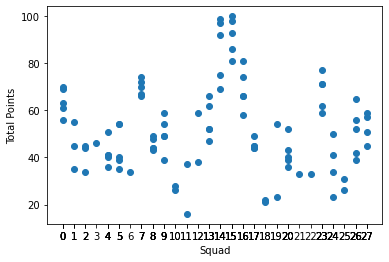

In [36]:
# Visually inspect relationship between Points and Squad
plt.scatter(points_df3.Squad, points_df3.Pts)
plt.xticks(points_df3.Squad)
plt.xlabel("Squad")
plt.ylabel("Total Points")
plt.show()

In [37]:
# Attribute and label
X = points_df3['Squad'].values.reshape(-1,1)
y = points_df3['Pts'].values.reshape(-1,1)

In [38]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Instantiate it and fit the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [40]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[54.04894728]
[[-0.01942041]]


In [41]:
# Make predictions 
y_pred = regressor.predict(X_test)

In [42]:
# Compare the actual output values
points_df4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
points_df4

,Actual,Predicted
0,57,53.524596
1,56,53.544017
2,77,53.602278
3,39,53.544017
4,41,53.971266
5,45,54.029527
6,36,53.660539
7,44,53.893584
8,41,53.971266
9,39,53.874164


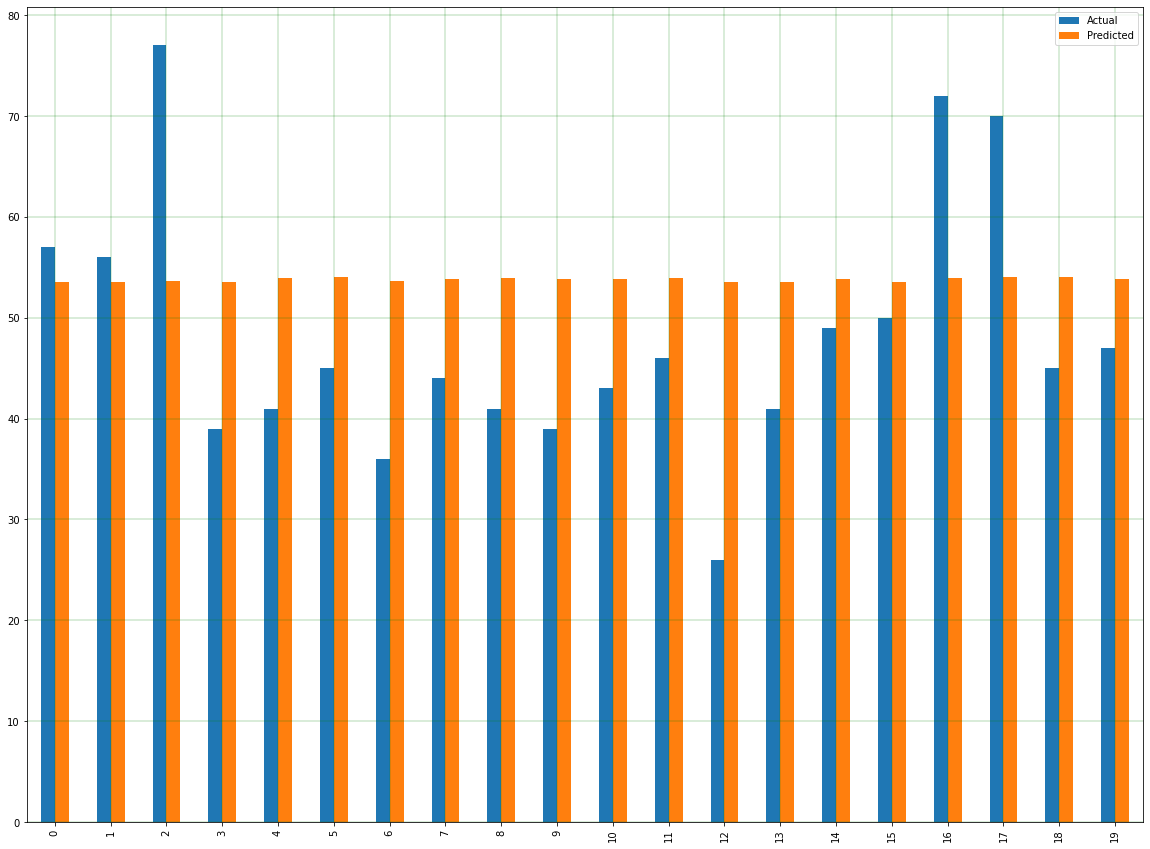

In [43]:
# Visualize as bar graph
points_df5 = points_df4.head(25)
points_df5.plot(kind='bar',figsize=(20,15))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()